In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

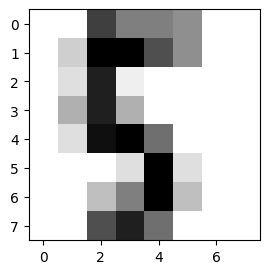

In [2]:
#Load the digits dataset
digits = datasets.load_digits()

#Display the 25th digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[25], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [3]:
digits, target = datasets.load_digits(return_X_y=True)

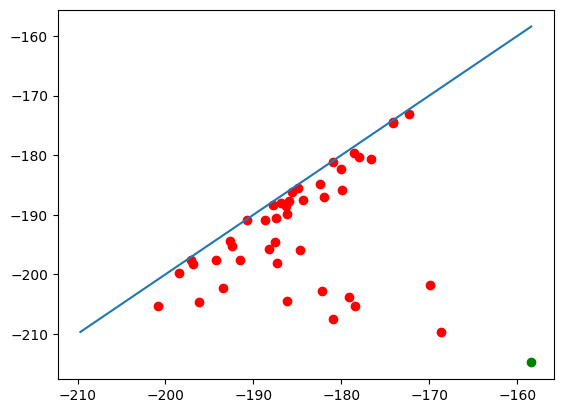

In [4]:
from gudhi.clustering.tomato import Tomato

# Instantiate a ToMaTo instance and fit digits on it
tomato = Tomato()
tomato.fit(digits)
# Plot the 0-persistence diagram - How many clusters do you see?
tomato.plot_diagram()

In [5]:
# Set the number of clusters to 10 (what it should be)
tomato.n_clusters_ = 10

ToMaTo labels may not correspond to target values. By this I mean that ToMaTo may label *zeros* ('0') with a ToMaTo label of value 1 (as class number).

To fix this, we are going to find the corresponding labels at maximal weights values:
* we get all the weights where the ToMaTo label is a '0'
* we find its maximal value
* we get the corresponding target value

We do this in loop for our ten target values and get a conversion dictionnary from ToMaTo label to the corresponding target.

In [6]:
label_dict = np.zeros(10, dtype=int)
for lbl in range(10):
    indices = np.where(tomato.labels_ == lbl)[0]
    idx_max = np.where(tomato.weights_ == max(tomato.weights_[indices]))[0][0]
    print(f"For index {idx_max}, tomato label is {lbl} and target {target[idx_max]}")
    label_dict[lbl] = target[idx_max]

For index 1334, tomato label is 0 and target 1
For index 1541, tomato label is 1 and target 0
For index 1005, tomato label is 2 and target 6
For index 624, tomato label is 3 and target 7
For index 1536, tomato label is 4 and target 4
For index 501, tomato label is 5 and target 2
For index 1518, tomato label is 6 and target 3
For index 455, tomato label is 7 and target 9
For index 1008, tomato label is 8 and target 1
For index 885, tomato label is 9 and target 5


You can notice from the result that 2 labels have been mixed and cannot be distinguished by ToMaTo.

In [7]:
# Convert ToMaTo labels
tomato_labels = label_dict[tomato.labels_]

Let's see if the classification worked:

In [8]:
result = np.zeros((10, 10), dtype=int)
for idx in range(len(target)):
    result[target[idx]][tomato_labels[idx]] += 1

print(result)

[[177   0   0   0   1   0   0   0   0   0]
 [  0 181   0   0   0   0   1   0   0   0]
 [  1  12 162   1   0   0   0   1   0   0]
 [  0   2   1 173   0   0   0   5   0   2]
 [  0   1   0   0 176   0   0   4   0   0]
 [  0   0   0   0   1  70   1   0   0 110]
 [  0   1   0   0   0   0 180   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0 165   3   2   0   1   1   2   0   0]
 [  0  22   0   3   0   2   0  10   0 143]]
